<a href="https://colab.research.google.com/github/UttaraKet1607/Malarial-Cell-Image-Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria

 99% 671M/675M [00:05<00:00, 122MB/s]
100% 675M/675M [00:05<00:00, 138MB/s]


In [6]:
! unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/cell_images"))

['Uninfected', 'cell_images', 'Parasitized']


In [8]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [9]:
parasitized_data = os.listdir('/content/cell_images/Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C104P65ThinF_IMG_20150918_172053_cell_187.png', 'C59P20thinF_IMG_20150803_113139_cell_40.png', 'C68P29N_ThinF_IMG_20150819_134830_cell_28.png', 'C180P141NThinF_IMG_20151201_165659_cell_6.png', 'C101P62ThinF_IMG_20150923_170110_cell_3.png', 'C82P43ThinF_IMG_20150817_124010_cell_188.png', 'C93P54ThinF_IMG_20150821_163452_cell_208.png', 'C179P140ThinF_IMG_20151127_153852_cell_159.png', 'C137P98ThinF_IMG_20151005_164119_cell_76.png', 'C39P4thinF_original_IMG_20150622_105803_cell_102.png']


['C114P75ThinF_IMG_20150930_150057_cell_103.png', 'C224ThinF_IMG_20151112_112334_cell_93.png', 'C238NThinF_IMG_20151207_114653_cell_58.png', 'C59P20thinF_IMG_20150803_113051_cell_50.png', 'C226ThinF_IMG_20151112_131622_cell_82.png', 'C206ThinF_IMG_20151029_141047_cell_96.png', 'C68P29N_ThinF_IMG_20150819_133236_cell_93.png', 'C204ThinF_IMG_20151029_110834_cell_97.png', 'C234ThinF_IMG_20151112_163036_cell_260.png', 'C106P67ThinF_IMG_20150924_102245_cell_152.png']


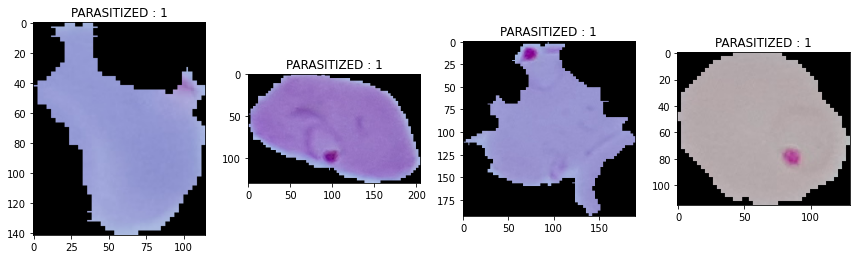

In [10]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

In [11]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

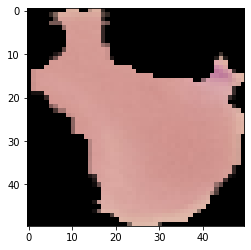

In [12]:
plt.imshow(data[0])
plt.show()

In [13]:
image_data = np.array(data)
labels = np.array(labels)

In [14]:
idx = np.arange(image_data.shape[0])
image_data = image_data[idx]
labels = labels[idx]

In [15]:
image_data.shape, labels.shape

((27558, 50, 50, 3), (27558,))

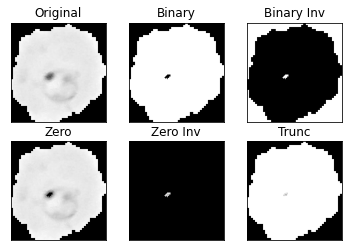

In [16]:
imgpath1 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = cv2.imread(imgpath1, 0)
th = 0
max_val = 255
    
ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
output = [img, o1, o2, o3, o4, o5]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Trunc']
    
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show()  

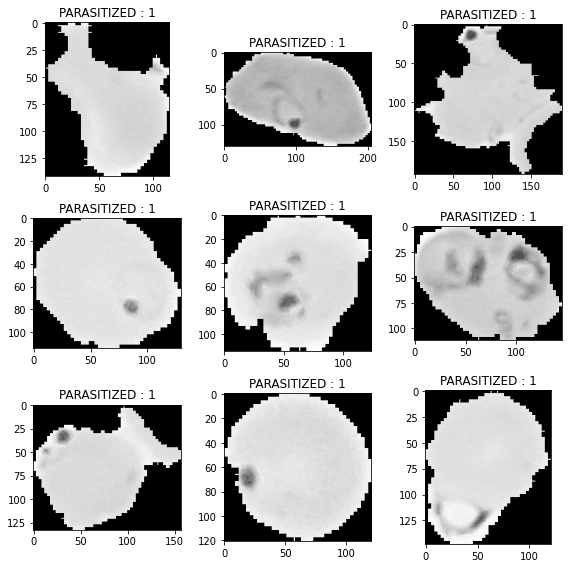

In [17]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    plt.imshow(img, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

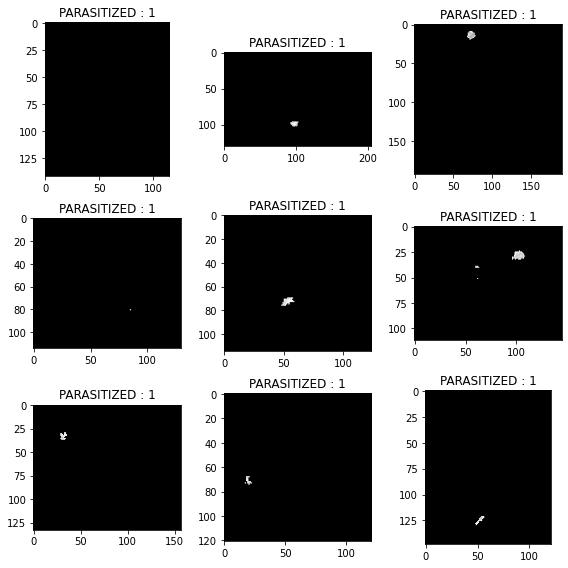

In [18]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    #img = cv2.filter2D(img, ddepth=-1, kernel=kernel)
    ret, o6 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
    plt.imshow(o6, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

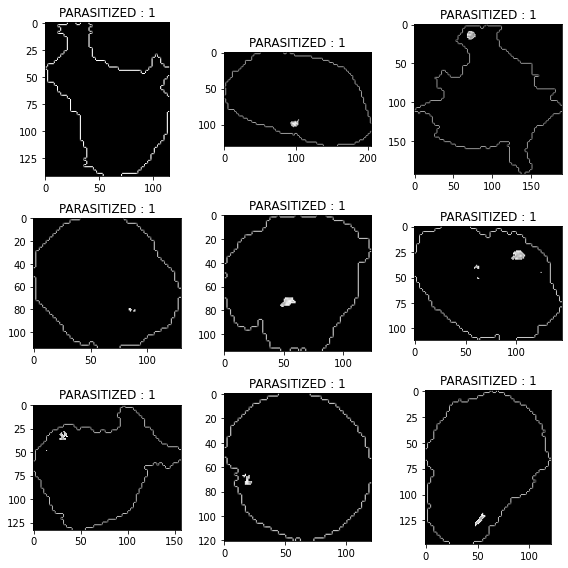

In [47]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    img = cv2.filter2D(img, ddepth=-1, kernel=kernel)
    blur = cv2.GaussianBlur(img,(3,3),0)
    ret, o6 = cv2.threshold(blur, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
    plt.imshow(o6, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

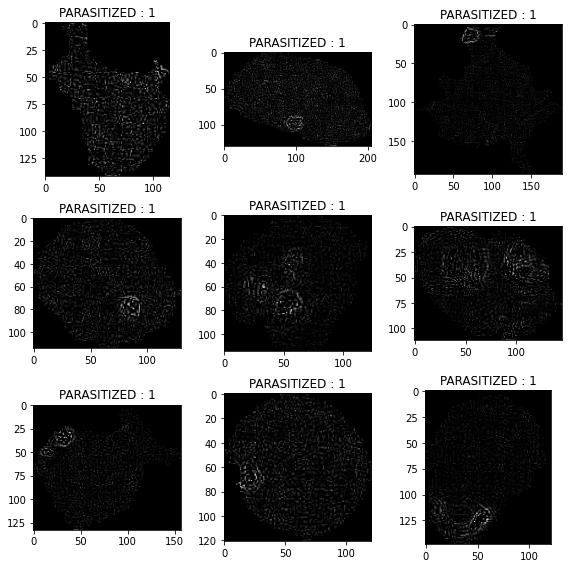

In [57]:
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#kernel = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
kernel = np.array([
  [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1]
])

plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    
    blur = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.filter2D(img, -1, kernel)
    ret, o6 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
    plt.imshow(o6, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

#https://www.askpython.com/python-modules/opencv-filter2d

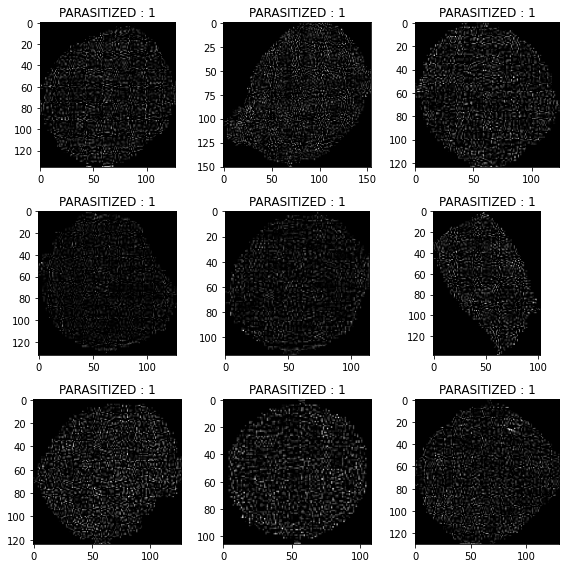

In [54]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i],0)
    
    blur = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.filter2D(img, -1, kernel)
    ret, o6 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
    plt.imshow(o6, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

#https://www.askpython.com/python-modules/opencv-filter2d